In [242]:
#importing libraries
import pandas as pd                                  # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots

#reading it through python
gameot = pd.read_excel(io = './path_practice/__storage/GOT_character_predictions.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
gameot.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


<h2>Part I: Preparation and Exploration</h2>

In [92]:
gameot.info() #checking info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

<h2>Part 2: Treating missing values in Dataset</h2>
Treated categorical values as unknown and numerical values with 0

In [93]:
gameot.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [94]:
#looping to detect features with missing values

for col in gameot:
    #creating columns with 1s if missing and 0 if not
    if gameot[col].isnull().astype(int).sum() > 0:
        gameot['m_'+col] = gameot[col].isnull().astype(int)
        
#summing the missing values flags to check the result of the loop above
gameot.iloc[ : , -13:    ].sum(axis = 0)

m_title            1008
m_culture          1269
m_dateOfBirth      1513
m_mother           1925
m_father           1920
m_heir             1923
m_house             427
m_spouse           1670
m_isAliveMother    1925
m_isAliveFather    1920
m_isAliveHeir      1923
m_isAliveSpouse    1670
m_age              1513
dtype: int64

In [95]:
for column in gameot:
    print(column)  #printing dataset columns

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive
m_title
m_culture
m_dateOfBirth
m_mother
m_father
m_heir
m_house
m_spouse
m_isAliveMother
m_isAliveFather
m_isAliveHeir
m_isAliveSpouse
m_age


In [96]:
#filling the missing values using fillna()
fill = 0

gameot['title'].fillna(value   = 'unknown', 
                       inplace = True)

gameot['culture'].fillna(value   = 'unknown', 
                       inplace = True)

gameot['dateOfBirth'].fillna(value   = 0, 
                       inplace = True)

gameot['mother'].fillna(value   = 'unknown', 
                       inplace = True)

gameot['father'].fillna(value   = 'unknown', 
                       inplace = True)

gameot['heir'].fillna(value   = 'unknown', 
                       inplace = True)

gameot['house'].fillna(value   = 'unknown', 
                       inplace = True)

gameot['spouse'].fillna(value   = 'unknown', 
                       inplace = True)

gameot['isAliveMother'].fillna(value   = 0, 
                       inplace = True)

gameot['isAliveFather'].fillna(value   = 0, 
                       inplace = True)

gameot['isAliveHeir'].fillna(value   = 0, 
                       inplace = True)

gameot['isAliveSpouse'].fillna(value   = 0, 
                       inplace = True)

gameot['age'].fillna(value   = 0, 
                       inplace = True)

print(gameot['age'].isnull().any())

False


In [97]:
df_corr = gameot.corr().round(2) #running correlation to see most correlated variables

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
m_isAliveFather               0.14
m_father                      0.14
m_mother                      0.14
m_isAliveMother               0.14
m_heir                        0.13
m_isAliveHeir                 0.13
age                           0.05
m_spouse                      0.05
m_isAliveSpouse               0.05
m_culture                     0.04
m_house                       0.04
m_title                       0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveSpouse                -0.01
isNoble                      -0.04
isAliveFather                -0.04
isMarried                    -0.05
dateOfBirth                  -0.06
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.08
isAliveMother                -0.12
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity          

In [9]:
#  gameot = pd.get_dummies(gameot, columns=['title', 'culture','mother',
#                                           'father', 'heir','house','spouse'])
#initially ran these codes and noted it broke the code if I ran them before gender guesser

In [32]:
# gameot.loc[ : , 'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [33]:
# #declaring explanatory variables 
# gameot_data = gameot.drop('isAlive', axis = 1)

# #declaring response variable
# gameot_target = gameot.loc[:, 'isAlive']

In [34]:
# #train-test split with stratification
# x_train, x_test, y_train, y_test = train_test_split(
#           gameot_data,
#           gameot_target,
#           test_size    = 0.10,
#           random_state = 219,
#           stratify = gameot_target) # preserving balance with this we are setting the same proportion of y_target in both train and test data

# #merging training data for statsmodels
# gameot_train = pd.concat([x_train, y_train], axis = 1)

In [35]:
# print(f"""

# Response Variable Proportions (Training Set)
# --------------------------------------------
# {y_train.value_counts(normalize = True).round(decimals = 2)}



# Response Variable Proportions (Testing Set)
# --------------------------------------------
# {y_test.value_counts(normalize = True).round(decimals = 2)}
# """)




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [115]:
# #Build a logistic regression model in statsmodel using all of the explanatory
# for val in gameot_data:
#     print(f" {val} + ")

 S.No + 
 dateOfBirth + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 
 name_Abelar Hightower + 
 name_Addam + 
 name_Addam Frey + 
 name_Addam Marbrand + 
 name_Addam Osgrey + 
 name_Addam Velaryon + 
 name_Addison Hill + 
 name_Aegon Blackfyre + 
 name_Aegon Frey (son of Aenys) + 
 name_Aegon Frey (son of Stevron) + 
 name_Aegon I Targaryen + 
 name_Aegon II Targaryen + 
 name_Aegon III Targaryen + 
 name_Aegon IV Targaryen + 
 name_Aegon Targaryen (son of Aenys I) + 
 name_Aegon Targaryen (son of Baelon) + 
 name_Aegon Targaryen (son of Jaehaerys I) + 
 name_Ae

 spouse_Corwyn Corbray + 
 spouse_Cousin to the Prince of Pentos + 
 spouse_Craster + 
 spouse_Daemon Targaryen + 
 spouse_Daenerys Targaryen + 
 spouse_Daenora Targaryen + 
 spouse_Dafyn Vance + 
 spouse_Damion Lannister + 
 spouse_Danwell Frey + 
 spouse_Darlessa Marbrand + 
 spouse_Davos Seaworth + 
 spouse_Deana Hardyng + 
 spouse_Delena Florent + 
 spouse_Denys Darklyn + 
 spouse_Denyse Hightower + 
 spouse_Desmond Redwyne + 
 spouse_Dickon Tarly + 
 spouse_Donella Hornwood + 
 spouse_Donella Manderly + 
 spouse_Dorna Swyft + 
 spouse_Drogo + 
 spouse_Eddard Stark + 
 spouse_Edmure Tully + 
 spouse_Elaena Targaryen + 
 spouse_Eldon Estermont + 
 spouse_Eleanor Mooton + 
 spouse_Elia Martell + 
 spouse_Ella Lannister + 
 spouse_Elyana Vypren + 
 spouse_Elyn Norridge + 
 spouse_Elys Waynwood + 
 spouse_Emmon Frey + 
 spouse_Erik Ironmaker + 
 spouse_Ermesande Hayford + 
 spouse_Falyse Stokeworth + 
 spouse_Flement Brax + 
 spouse_Garlan Tyrell + 
 spouse_Garse Goodbrook + 
 spouse_G

In [133]:
# gameot['isAlive']

0       0
1       1
2       1
3       0
4       1
       ..
1941    0
1942    0
1943    1
1944    1
1945    0
Name: isAlive, Length: 1946, dtype: int64

In [114]:
# gameot.corr()

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
S.No,1.000000,0.048857,0.290130,0.312403,0.368665,0.284554,0.405907,-0.063003,-0.048707,-0.096818,0.136390,0.150648,0.241642,-0.045620,0.092734,0.277761,-0.128712,-0.242113,-0.070717,-0.239813,0.093180,0.088039,0.111802,-0.274353,-0.150648,0.093180,0.088039,0.111802,-0.150648,-0.239813
dateOfBirth,0.048857,1.000000,0.066328,0.044917,0.005435,-0.002367,0.008015,-0.003347,-0.001927,-0.003347,-0.009601,-0.011042,-0.029839,-0.999915,0.067528,0.013897,-0.055590,0.031252,-0.009262,-0.070990,0.003967,0.004419,0.004153,-0.018749,0.011042,0.003967,0.004419,0.004153,0.011042,-0.070990
book1_A_Game_Of_Thrones,0.290130,0.066328,1.000000,0.392439,0.243843,0.079959,0.264818,-0.043842,-0.025247,-0.043842,0.091889,0.085895,0.095848,-0.064197,0.191853,0.324782,-0.147401,-0.110750,-0.123681,-0.152164,0.051955,0.046661,0.054401,-0.111157,-0.085895,0.051955,0.046661,0.054401,-0.085895,-0.152164
book2_A_Clash_Of_Kings,0.312403,0.044917,0.392439,1.000000,0.449931,0.175937,0.225677,-0.068214,-0.039282,-0.068214,0.147175,0.157045,0.023366,-0.041121,0.075281,0.247918,-0.067200,-0.011923,-0.000860,-0.259827,0.080837,0.080818,0.084643,-0.179471,-0.157045,0.080837,0.080818,0.084643,-0.157045,-0.259827
book3_A_Storm_Of_Swords,0.368665,0.005435,0.243843,0.449931,1.000000,0.373553,0.285103,-0.084759,-0.048809,-0.084759,0.143370,0.151504,0.024793,-0.002153,0.052870,0.214018,0.006693,-0.013002,0.093460,-0.217500,0.100444,0.111909,0.105173,-0.171884,-0.151504,0.100444,0.111909,0.105173,-0.151504,-0.217500
book4_A_Feast_For_Crows,0.284554,-0.002367,0.079959,0.175937,0.373553,1.000000,0.337415,-0.106162,-0.061135,-0.106162,0.139162,0.127712,0.079689,0.004969,-0.007731,0.116085,0.268975,-0.078930,0.012673,-0.157547,0.125809,0.140169,0.131732,-0.163657,-0.127712,0.125809,0.140169,0.131732,-0.127712,-0.157547
book5_A_Dance_with_Dragons,0.405907,0.008015,0.264818,0.225677,0.285103,0.337415,1.000000,-0.071241,-0.041025,-0.071241,0.110776,0.096210,0.102340,-0.005482,0.103986,0.215681,0.032846,-0.101668,-0.181997,-0.169044,0.084425,0.094061,0.088399,-0.174579,-0.096210,0.084425,0.094061,0.088399,-0.096210,-0.169044
isAliveMother,-0.063003,-0.003347,-0.043842,-0.068214,-0.084759,-0.106162,-0.071241,1.000000,0.343727,0.328155,-0.031062,-0.035830,-0.081501,0.002747,0.341505,0.332145,-0.123915,0.085021,0.039703,0.047150,-0.843840,-0.757388,-0.642791,0.166234,0.035830,-0.843840,-0.757388,-0.642791,0.035830,0.047150
isAliveFather,-0.048707,-0.001927,-0.025247,-0.039282,-0.048809,-0.061135,-0.041025,0.343727,1.000000,0.459794,-0.017887,-0.020633,-0.046933,0.001582,0.098836,0.160322,-0.040280,0.048960,0.015759,0.027152,-0.289440,-0.436150,-0.370158,0.095728,0.020633,-0.289440,-0.436150,-0.370158,0.020633,0.027152
isAliveHeir,-0.096818,-0.003347,-0.043842,-0.068214,-0.084759,-0.106162,-0.071241,0.328155,0.459794,1.000000,-0.031062,-0.035830,-0.081501,0.002747,0.248074,0.317700,-0.083440,0.085021,0.052039,0.047150,-0.616361,-0.655035,-0.805898,0.166234,0.035830,-0.616361,-0.655035,-0.805898,0.035830,0.047150


<h2>Part 3: Ran the code for Gender Guesser</h2>
This is to predict gender and create dummies based on this

In [98]:
# importing libraries to add a gender column
import random as rand # random number generation
import gender_guesser.detector as gender # guess gender based on (given) name

In [99]:
#STEP 1: splitting first names from names

#placeholder list
placeholder_lst = []

#looping to guess gender
for index, col in gameot.iterrows():
    
    #splitting name at ' '
    split_name = gameot.loc[index,'name'].split(sep = ' ')
    
    #appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    
    #converting placeholder_lst into a DataFrame
gameot['first_name'] = pd.DataFrame(placeholder_lst).iloc[ : , 0]
    
gameot['first_name']

0         Viserys
1          Walder
2         Addison
3           Aemma
4           Sylva
          ...    
1941        Luwin
1942         Reek
1943       Symeon
1944    Coldhands
1945        Tytos
Name: first_name, Length: 1946, dtype: object

In [20]:
# #STEP 1: splitting first names from names

# #placeholder list
# placeholder_lst = []


# #looping to guess gender
# for name in gameot["first_name"]:
#     guess = gender.Detector().get_gender(name)
#     print(guess)
#     placeholder_lst.append(guess)
    
# #converting list into a series
# gameot['gender_guess'] = pd.Series(placeholder_lst)

# gameot.head()

# for val in gameot['gender_guess']:
#     print(f"""'{val}'""", end = ', ')

unknown
unknown
andy
unknown
female
unknown
unknown
unknown
male
male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
mostly_male
unknown
male
unknown
unknown
male
male
female
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
mostly_female
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
male
male
andy
andy
unknown
andy
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
male
male
unknown
male
male
male
male
male
male
male
mostly_male
male
mostly_male
mostly_male
unknown
unknown
unknown
male
unknown
male
unknown
male
unknown
male
unknown
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
mostly_male
unknown
unknown
male


unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
unknown
unknown
unknown
male
unknown
unknown
unknown
female
unknown
male
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
male
male
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
female
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
female
unknown
female
male
unknown
unknown
unknown
unknown
unknown
unknown
male
male
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
male
unknown
male
unknown
unknown
male
unknown
female
unknown
unknown
unknown
mostly_male
male
unknown
unknown
male
male
male
unknown
female
unknown
unknown
unknown
unknown
female
unknown
female
female
female
male
male
unknown
unknown
unknown
male
male
unknown
male
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
female
unknown

In [100]:
gender_guess_list = ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']
gameot['gender_guess'] = pd.Series(gender_guess_list)

In [101]:
#one hot encoding variables
one_hot_gender_guess = pd.get_dummies(gameot['gender_guess'])


#joining codings together
gameot = gameot.join(other = [one_hot_gender_guess])

gameot.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'first_name', 'gender_guess', 'andy', 'female', 'male', 'mostly_female', 'mostly_male', 'unknown'], dtype='object')

In [102]:
gameot['is_male'] = gameot['male'] + gameot['mostly_male'] + gameot['andy']

gameot['is_male'].value_counts()

0    1531
1     415
Name: is_male, dtype: int64

In [103]:
#binning houses

#Create new feature using a np where () function

gameot['powerful_house'] = np. where((gameot['house'] == 'House Tully') |
                                     (gameot['house'] == 'House Arryn') |
                                     (gameot['house'] == 'House Martell') |
                                     (gameot['house'] == 'House Baratheon') |
                                     (gameot['house'] == 'House Tyrell') |
                                     (gameot['house'] == 'House Greyjoy') |
                                     (gameot['house'] == 'House Lannister') |
                                     (gameot['house'] == 'House Targaryen') |
                                     (gameot['house'] == 'House Stark') |
                                     (gameot['house'] == 'House Umber') |
                                     (gameot['house'] == 'House Mormont') |
                                     (gameot['house'] == 'House Karstark') |
                                     (gameot['house'] == 'House Baratheon of Dragonstone'),1,0)
#check if function works
gameot['powerful_house'].value_counts()

0    1585
1     361
Name: powerful_house, dtype: int64

In [104]:
#binning/grouping title
gameot['is_TSer'] = 0

for index, value in gameot.iterrows():
    
    if gameot.loc[index , 'title'] == "Ser":
        gameot.loc[index , 'is_TSer'] = 1
        
gameot.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,first_name,gender_guess,andy,female,male,mostly_female,mostly_male,unknown,is_male,powerful_house,is_TSer
0,1,Viserys II Targaryen,unknown,unknown,0.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,unknown,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,0.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,Viserys,unknown,0,0,0,0,0,1,0,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,unknown,unknown,unknown,House Frey,Perra Royce,1,1,1,1,1,0.0,0.0,0.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Walder,unknown,0,0,0,0,0,1,0,0,0
2,3,Addison Hill,Ser,unknown,0.0,unknown,unknown,unknown,House Swyft,unknown,0,0,0,1,0,0.0,0.0,0.0,0.0,0,1,0.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,Addison,andy,1,0,0,0,0,0,1,0,1
3,4,Aemma Arryn,Queen,unknown,82.0,unknown,unknown,unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,0.0,0.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,Aemma,unknown,0,0,0,0,0,1,0,1,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,unknown,unknown,unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0.0,0.0,0.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,Sylva,female,0,1,0,0,0,0,0,0,0


In [105]:
#binning/grouping title
gameot['is_culture_unknown_bin'] = 0

for index, value in gameot.iterrows():
    
    if gameot.loc[ index, 'culture'] == 'Unknown':
        gameot.loc[ index, 'is_culture_unknown_bin'] = 1
        
gameot['is_culture_unknown_bin'].value_counts()

0    1946
Name: is_culture_unknown_bin, dtype: int64

In [106]:
#creating a boolean for is_relative_alive 1= there are relatives that are dead and 0 = there are no relatives dead 
#We will still use the other column as well

gameot['is_relative_alive'] = 0

for index, value in gameot.iterrows():
    
    if gameot.loc[ index, 'numDeadRelations'] >0:
        gameot.loc[ index, 'is_relative_alive'] = 1
        
gameot['is_relative_alive'].value_counts()

0    1801
1     145
Name: is_relative_alive, dtype: int64

In [107]:
#dropping the data

gameot_data = gameot.drop(['S.No', 
                           'name', 
                           'title',
                           'culture',
                           'age',
                           'mother',
                           'father', 
                           'heir', 
                           'house', 
                           'spouse',
                           'isAliveMother', 
                           'isAliveFather', 
                           'isAliveHeir', 
                           'isAliveSpouse',
                           'first_name', 
                           'gender_guess',
                           'andy', 
                           'female', 
                           'male',
                           'mostly_female',
                           'mostly_male', 
                           'unknown'],
                         axis = 1)

In [108]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.10
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<h2>Part 4: Preparing Explanatory and Response Data</h2>

In [109]:
 gameot.loc[ : , 'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [110]:
# #declaring explanatory variables 
gameot_data = gameot.drop('isAlive', axis = 1)

# #declaring response variable
gameot_target = gameot.loc[:, 'isAlive']

In [111]:
#train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
           gameot_data,
           gameot_target,
           test_size    = 0.10,
           random_state = 219,
           stratify = gameot_target) # preserving balance with this we are setting the same proportion of y_target in both train and test data

# #merging training data for statsmodels
gameot_train = pd.concat([x_train, y_train], axis = 1)

In [112]:
 print(f"""

 Response Variable Proportions (Training Set)
 --------------------------------------------
 {y_train.value_counts(normalize = True).round(decimals = 2)}



 Response Variable Proportions (Testing Set)
 --------------------------------------------
 {y_test.value_counts(normalize = True).round(decimals = 2)}
 """)




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [113]:
df_corr = gameot.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
m_mother                      0.14
m_isAliveFather               0.14
m_isAliveMother               0.14
m_father                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
female                        0.05
m_isAliveSpouse               0.05
m_spouse                      0.05
age                           0.05
m_house                       0.04
m_culture                     0.04
m_title                       0.04
book5_A_Dance_with_Dragons    0.03
mostly_male                   0.01
andy                          0.01
book3_A_Storm_Of_Swords       0.01
is_male                      -0.00
mostly_female                 0.00
male                         -0.01
isAliveSpouse                -0.01
is_TSer                      -0.02
unknown                      -0.03
isAliveFather                -0.04
isNoble             

<h2>Part 5: Building different models</h2>

In [114]:
#Building a logistic regression model in statsmodel using the explanatory variable that is most highly correlated with the response variable
#instantiating a logistic regression model object
logistic_small = smf.logit(formula  = """isAlive ~ book4_A_Feast_For_Crows""",
                           data     = gameot_train)

#Fitting the model object
results_logistic = logistic_small.fit()

#checking the results summary
results_logistic.summary2()  # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-07 00:35  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [ ]:
# book4_A_Feast_For_Crows      
# m_age                         
# m_dateOfBirth                
# m_mother                      
# m_isAliveFather               
# m_isAliveMother              
# m_father                    
# m_isAliveHeir               
# m_heir                   
# female                        
# m_isAliveSpouse               
# m_spouse                    
# age                          
# m_house                      
# m_culture                    
# m_title                       
# book5_A_Dance_with_Dragons    
# mostly_male                   
# andy                          
# book3_A_Storm_Of_Swords       
# is_male                     
# mostly_female                
# male                        
# isAliveSpouse              
# is_TSer                    
# unknown                      
# isAliveFather                
# isNoble                      
# isMarried                    
# dateOfBirth                  
# book2_A_Clash_Of_Kings     
# isAliveHeir                  
# powerful_house              
# isAliveMother                
# S.No                         
# book1_A_Game_Of_Thrones      
# popularity                  
# numDeadRelations             
# is_relative_alive            

In [116]:
# instantiating a logistic regression model object 
#took out isalivefather
logistic_full = smf.logit(formula = """ isAlive ~ book4_A_Feast_For_Crows+
 m_age """,
                                        data    = gameot_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.516309
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.089     
Dependent Variable:   isAlive            AIC:                1814.1150 
Date:                 2021-12-07 00:36   BIC:                1830.5189 
No. Observations:     1751               Log-Likelihood:     -904.06   
Df Model:             2                  LL-Null:            -992.53   
Df Residuals:         1748               LLR p-value:        3.7596e-39
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -0.4831   0.1414 -3.4172 0.0006 -0.7603 -0.2060
book4_A_Feast_For_Crows  1.4069   0.1225 11.4895 0.0000  1.1669  1.6470
m_age                    1.1036   0.1377  8.0138 0.0000  0.8337  1.3735
=======================================================================

"""

In [117]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """isAlive ~ m_age+
book4_A_Feast_For_Crows +
m_isAliveFather +
m_mother +
m_heir +
m_culture +
book5_A_Dance_with_Dragons +
m_title +
book3_A_Storm_Of_Swords +
isAliveSpouse +
isNoble +
isAliveFather +
isMarried +
book2_A_Clash_Of_Kings +
isAliveMother +
book1_A_Game_Of_Thrones +
popularity +
numDeadRelations+
is_relative_alive+
powerful_house+
isAliveHeir+
is_TSer+
is_male+
m_house+
m_spouse+
m_isAliveSpouse+
m_isAliveHeir""",
                                     data    = gameot_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary2()

         Current function value: 0.488071
         Iterations: 35


C:\Users\IFEAJ\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Logit
===============================================================================================
Model:                        Logit                      Pseudo R-squared:           0.139     
Dependent Variable:           isAlive                    AIC:                        1759.2236 
Date:                         2021-12-07 00:37           BIC:                        1895.9221 
No. Observations:             1751                       Log-Likelihood:             -854.61   
Df Model:                     24                         LL-Null:                    -992.53   
Df Residuals:                 1726                       LLR p-value:                1.1797e-44
Converged:                    0.0000                     Scale:                      1.0000    
No. Iterations:               35.0000                                                          
-----------------------------------------------------------------------------------------------
                            Coef.      Std.Err.      z    P>|z|       [0.025         0.975]    
-----------------------------------------------------------------------------------------------
Intercept                  -14.0521 11776119.5794 -0.0000 1.0000  -23080784.3054  23080756.2012
m_age                        0.8024        0.1576  5.0903 0.0000          0.4935         1.1114
book4_A_Feast_For_Crows      1.6989        0.1552 10.9471 0.0000          1.3947         2.0030
m_isAliveFather              0.5275        1.1008  0.4792 0.6318         -1.6300         2.6849
m_mother                     1.8758        1.7422  1.0767 0.2816         -1.5389         5.2905
m_heir                      10.2834           nan     nan    nan             nan            nan
m_culture                    0.0997        0.1390  0.7171 0.4733         -0.1728         0.3722
book5_A_Dance_with_Dragons  -0.0217        0.1477 -0.1472 0.8830         -0.3112         0.2677
m_title                      0.0870        0.4518  0.1925 0.8473         -0.7986         0.9726
book3_A_Storm_Of_Swords     -0.2894        0.1502 -1.9267 0.0540         -0.5838         0.0050
isAliveSpouse                0.7287        0.3666  1.9878 0.0468          0.0102         1.4471
isNoble                      0.0312        0.4617  0.0675 0.9462         -0.8737         0.9360
isAliveFather               -0.0642        1.3512 -0.0475 0.9621         -2.7125         2.5841
isMarried                   -9.5970 11776275.2277 -0.0000 1.0000  -23081084.9153  23081065.7212
book2_A_Clash_Of_Kings      -0.2782        0.1437 -1.9351 0.0530         -0.5599         0.0036
isAliveMother                0.5753        1.5576  0.3694 0.7119         -2.4774         3.6281
book1_A_Game_Of_Thrones     -0.5518        0.1616 -3.4154 0.0006         -0.8685        -0.2352
popularity                  -0.3162        0.5220 -0.6058 0.5446         -1.3394         0.7069
numDeadRelations             0.0049        0.0689  0.0713 0.9432         -0.1301         0.1399
is_relative_alive           -0.4619        0.3503 -1.3185 0.1873         -1.1485         0.2247
powerful_house              -0.0540        0.1700 -0.3180 0.7505         -0.3871         0.2791
isAliveHeir                 20.6504    14335.3639  0.0014 0.9989     -28076.1466     28117.4473
is_TSer                     -0.2413        0.1866 -1.2929 0.1961         -0.6070         0.1245
is_male                     -0.1534        0.1522 -1.0081 0.3134         -0.4517         0.1449
m_house                      0.3356        0.1714  1.9586 0.0502         -0.0002         0.6715
m_spouse                    -4.4551 51148825.0944 -0.0000 1.0000 -100249859.4916 100249850.5814
m_isAliveSpouse             -4.4551 39320602.1913 -0.0000 1.0000  -77066968.6005  77066959.6903
m_isAliveHeir               10.2834           nan     nan    nan             nan            nan
========================================================

In [118]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ isAlive ~ m_age +
book4_A_Feast_For_Crows +
book3_A_Storm_Of_Swords +
isAliveSpouse +
book2_A_Clash_Of_Kings +
book1_A_Game_Of_Thrones +
is_TSer +
is_male +
is_relative_alive +
m_house""",
                                            data    = gameot_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.496065
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.125     
Dependent Variable:   isAlive            AIC:                1759.2194 
Date:                 2021-12-07 00:37   BIC:                1819.3667 
No. Observations:     1751               Log-Likelihood:     -868.61   
Df Model:             10                 LL-Null:            -992.53   
Df Residuals:         1740               LLR p-value:        1.5378e-47
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.0666   0.1705  0.3905 0.6961 -0.2676  0.4007
m_age                    0.7754   0.1511  5.1312 0.0000  0.4792  1.0716
book4_A_Feast_For_Crows  1.7038   0.1451 11.7445 0.0000  1.4195  1.9882
book3_A_Storm_Of_Swords -0.2184   0.1442 -1.5151 0.1298 -0.5009  0.0641
isAliveSpouse            0.0828   0.2032  0.4073 0.6838 -0.3155  0.4810
book2_A_Clash_Of_Kings  -0.2835   0.1411 -2.0093 0.0445 -0.5600 -0.0070
book1_A_Game_Of_Thrones -0.5201   0.1537 -3.3846 0.0007 -0.8213 -0.2189
is_TSer                 -0.2251   0.1541 -1.4609 0.1440 -0.5271  0.0769
is_male                 -0.1233   0.1507 -0.8179 0.4134 -0.4187  0.1722
is_relative_alive       -1.0732   0.2115 -5.0736 0.0000 -1.4878 -0.6586
m_house                  0.2142   0.1542  1.3892 0.1648 -0.0880  0.5165
=======================================================================

"""

In [119]:
# instantiating a logistic regression model object using lower P values
logit_sig_2 = smf.logit(formula = """ isAlive ~ book4_A_Feast_For_Crows +
book1_A_Game_Of_Thrones +
popularity +
is_relative_alive+
m_house""",
                                            data    = gameot_train)


# fitting the model object
logit_sig_2 = logit_sig_2.fit()


# checking the results SUMMARY
logit_sig_2.summary2()

Optimization terminated successfully.
         Current function value: 0.503089
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.112     
Dependent Variable:   isAlive            AIC:                1773.8183 
Date:                 2021-12-07 00:37   BIC:                1806.6259 
No. Observations:     1751               Log-Likelihood:     -880.91   
Df Model:             5                  LL-Null:            -992.53   
Df Residuals:         1745               LLR p-value:        2.9906e-46
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.5791   0.0929  6.2338 0.0000  0.3971  0.7612
book4_A_Feast_For_Crows  1.4785   0.1252 11.8070 0.0000  1.2331  1.7239
book1_A_Game_Of_Thrones -0.5566   0.1483 -3.7540 0.0002 -0.8471 -0.2660
popularity              -1.6299   0.4230 -3.8530 0.0001 -2.4590 -0.8008
is_relative_alive       -0.8244   0.2486 -3.3161 0.0009 -1.3117 -0.3372
m_house                  0.4374   0.1498  2.9189 0.0035  0.1437  0.7311
=======================================================================

"""

In [170]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['m_age', 'book4_A_Feast_For_Crows','m_isAliveFather', 
                   'm_mother','m_heir','m_culture','book5_A_Dance_with_Dragons', 
                   'm_title','book3_A_Storm_Of_Swords','isAliveSpouse', 
                   'isNoble', 'isAliveFather','isMarried', 'book2_A_Clash_Of_Kings',
                   'isAliveMother','book1_A_Game_Of_Thrones','popularity',
                   'numDeadRelations','is_relative_alive', 'powerful_house',
                   'isAliveHeir','is_TSer','is_male','m_house','m_spouse',
                   'm_isAliveSpouse','m_isAliveHeir'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['m_age','book4_A_Feast_For_Crows','book3_A_Storm_Of_Swords', 
                   'isAliveSpouse','book2_A_Clash_Of_Kings',
                   'book1_A_Game_Of_Thrones','is_TSer', 'is_male',
                   'is_relative_alive','m_house'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book4_A_Feast_For_Crows','book1_A_Game_Of_Thrones', 
                   'popularity','m_house','is_relative_alive']

}

In [171]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['m_age', 'book4_A_Feast_For_Crows', 'm_isAliveFather', 'm_mother', 'm_heir', 'm_culture', 'book5_A_Dance_with_Dragons', 'm_title', 'book3_A_Storm_Of_Swords', 'isAliveSpouse', 'isNoble', 'isAliveFather', 'isMarried', 'book2_A_Clash_Of_Kings', 'isAliveMother', 'book1_A_Game_Of_Thrones', 'popularity', 'numDeadRelations', 'is_relative_alive', 'powerful_house', 'isAliveHeir', 'is_TSer', 'is_male', 'm_house', 'm_spouse', 'm_isAliveSpouse', 'm_isAliveHeir']


First Significant p-value Model:
--------------------------------
['m_age', 'book4_A_Feast_For_Crows', 'book3_A_Storm_Of_Swords', 'isAliveSpouse', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones', 'is_TSer', 'is_male', 'is_relative_alive', 'm_house']


Second Significant p-value Model:
---------------------------------
['book4_A_Feast_For_Crows', 'book1_A_Game_Of_Thrones', 'popularity', 'm_house', 'is_relative_alive']



In [172]:
#Build a logistic regression model in scikit-learn
#train/test split with full model
gameot_data   = gameot.loc[ : , candidate_dict['logit_sig']]
gameot_target = gameot.loc[ : , 'isAlive']

x_train, x_test, y_train, y_test = train_test_split(
            gameot_data,
            gameot_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = gameot_target)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)

# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.763
Testing  ACCURACY: 0.8256


In [173]:
#creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 20  30]
 [  4 141]]


In [174]:
#unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 4
True Positives : 141



In [175]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6862


In [176]:
# zipping each feature name to its coefficient
logreg_model_values = zip(gameot[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.08)
('book4_A_Feast_For_Crows', 0.76)
('book1_A_Game_Of_Thrones', 1.66)
('popularity', -0.2)
('m_house', 0.08)
('is_relative_alive', -0.28)


In [177]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [178]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8252
Full Tree Testing ACCURACY : 0.8205
Full Tree AUC Score: 0.6959


In [179]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 7
True Positives : 138



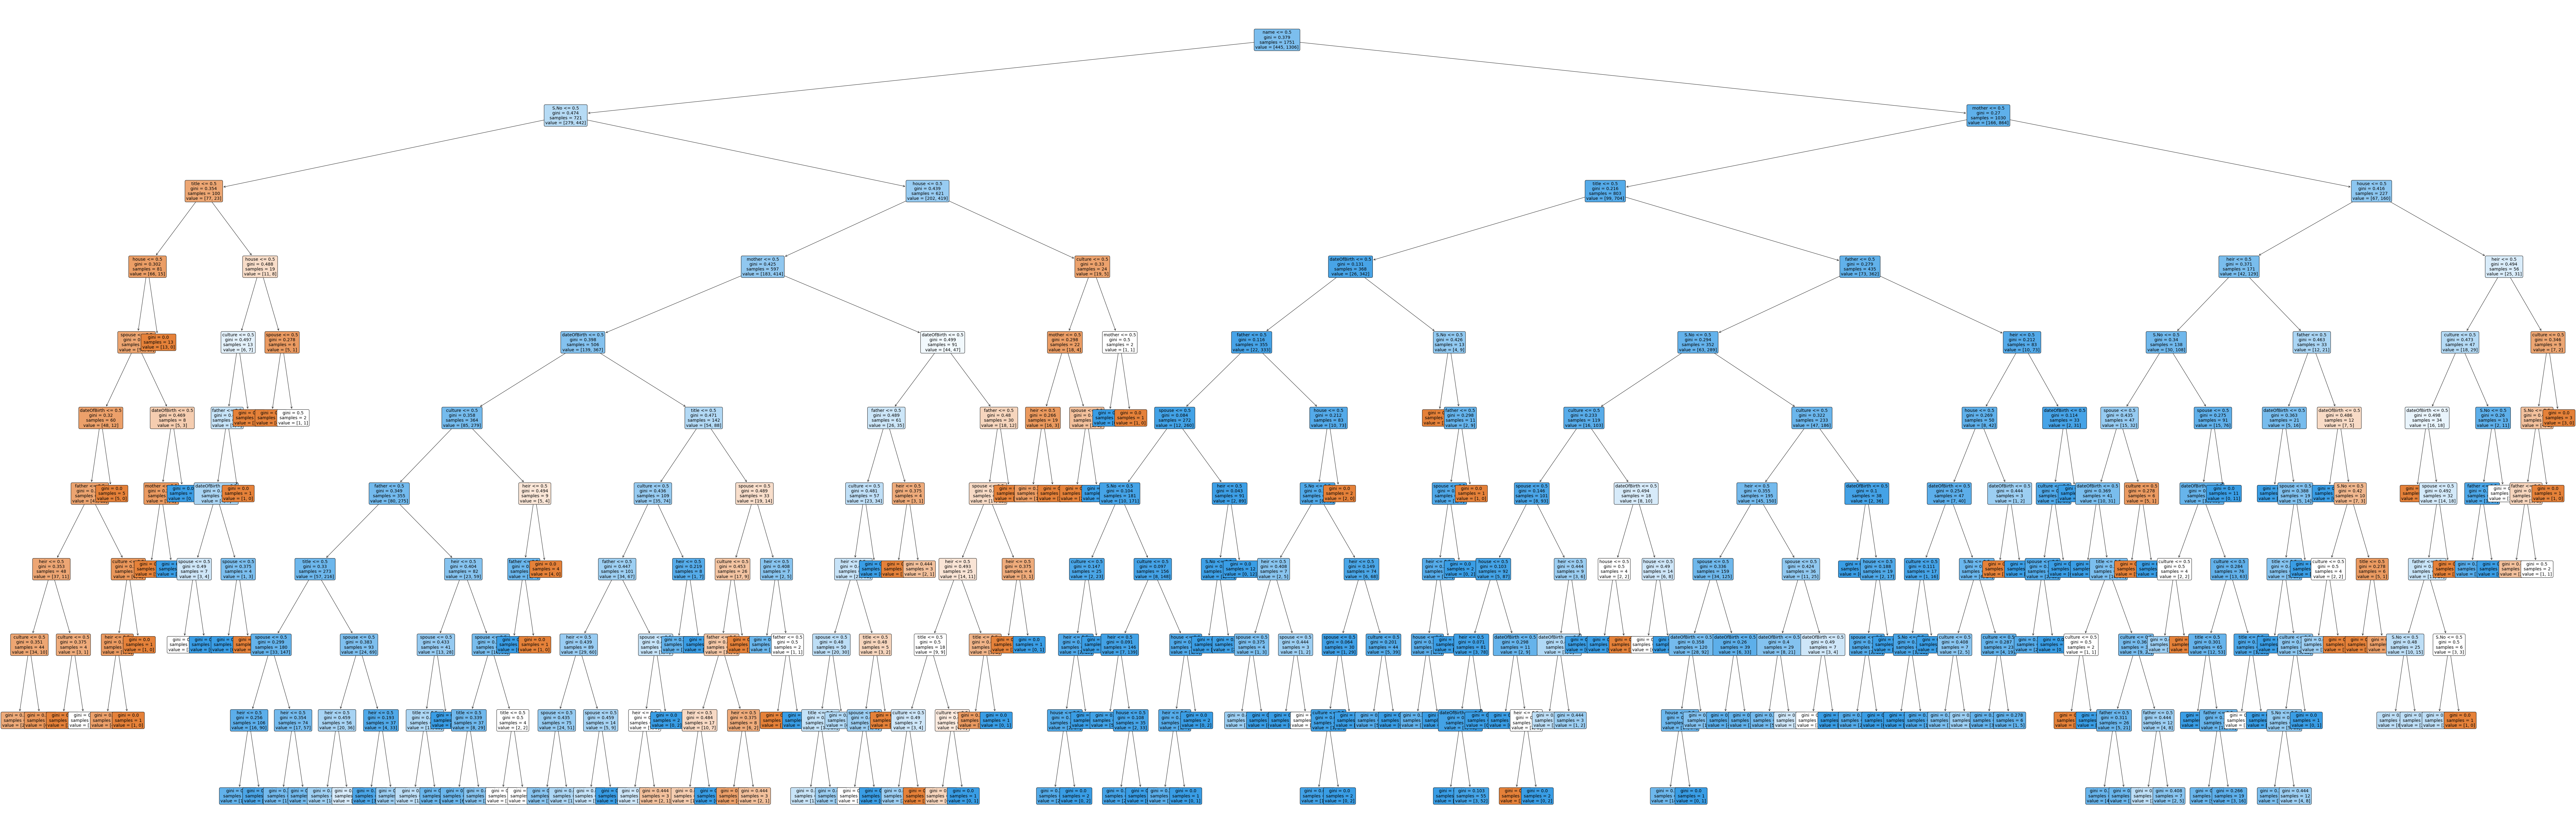

In [180]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = gameot.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [181]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 5,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pred).round(4) # auc

Training ACCURACY: 0.7836
Testing  ACCURACY: 0.8359
AUC Score        : 0.6997


In [182]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 3
True Positives : 142



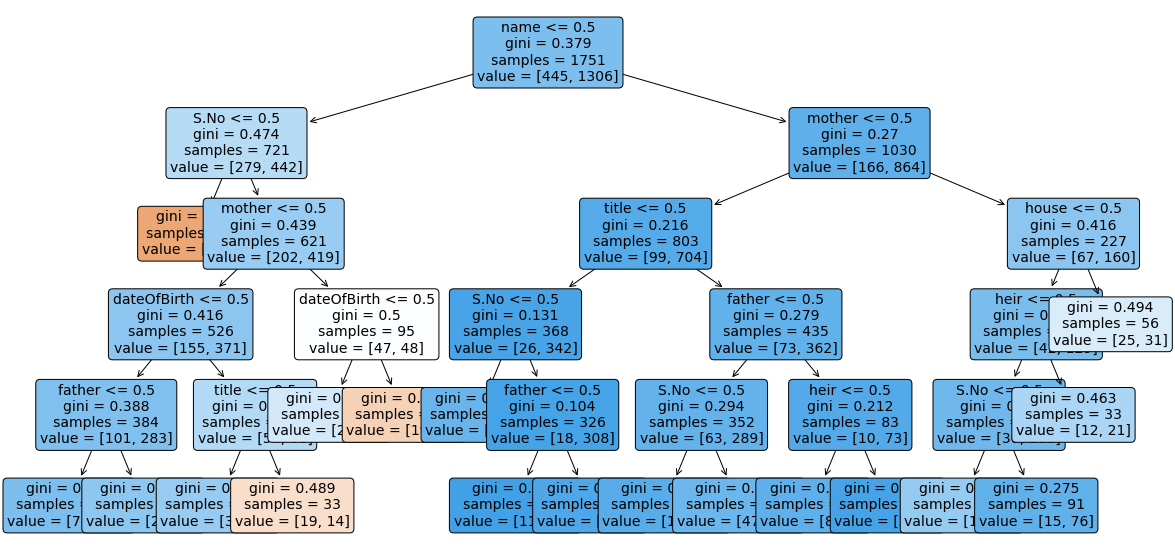

In [183]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned_fit, # changing to pruned_tree_fit
          feature_names = gameot.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

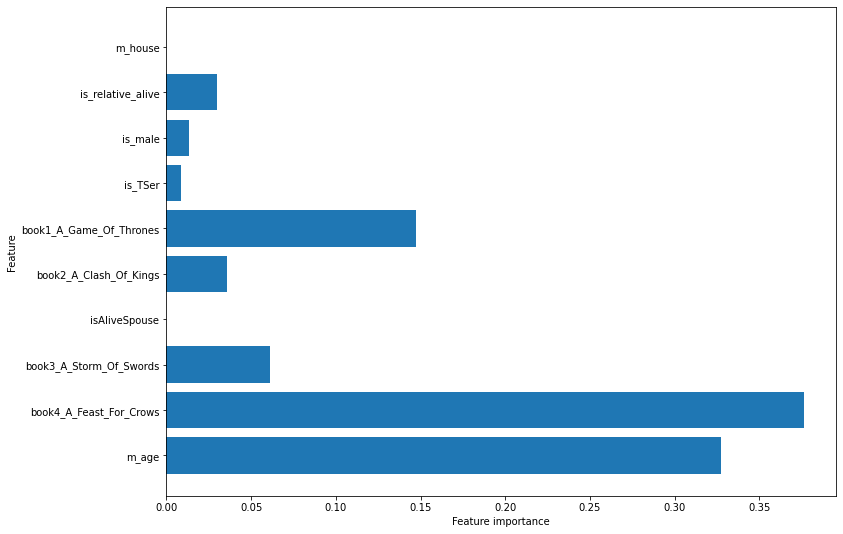

In [184]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = x_train,
                         export = False)

In [185]:
#Comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./path_practice/__storage/classification_model_performance_new.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6862         (20, 30, 4, 141)
Full Tree     0.6959           (22, 28, 7, 138)
Pruned Tree   0.6997         (21, 29, 3, 142)



In [186]:
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

In [187]:
# train/test split with the logit_sig variables
gameot_data   =  gameot.loc[ : ,  candidate_dict['logit_sig_2']]
gameot_target =  gameot.loc[ : ,  'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            gameot_data,
            gameot_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = gameot_target)

In [188]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [189]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7676
Testing  ACCURACY: 0.8205
AUC Score        : 0.6762


In [190]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(gameot_data, gameot_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'C': 2.4000000000000004}
Tuned CV AUC      : 0.5911


In [154]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=2.4000000000000004, max_iter=1000, random_state=219)

In [191]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 2.4000000000000004,
                              warm_start   = False,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model
lr_tuned.fit(gameot_data, gameot_target)


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7579
Testing  ACCURACY: 0.8205
AUC Score        : 0.6828


In [192]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 5
True Positives : 140



In [193]:
# loading model performance
model_performance = pd.read_excel('./path_practice/__storage/classification_model_performance_new.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6862,0.7630,0.8256,"(20, 30, 4, 141)"
1,Full Tree,0.6959,0.8252,0.8205,"(22, 28, 7, 138)"
2,Pruned Tree,0.6997,0.7836,0.8359,"(21, 29, 3, 142)"
3,Tuned LR,0.6828,0.7579,0.8205,"(20, 30, 5, 140)"


In [194]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(gameot_data, gameot_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 31, 'max_depth': 4, 'criterion': 'gini'}
Tuned Training AUC: 0.6676


In [159]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 31,
                                    max_depth        = 4,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(gameot_data, gameot_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7778
Testing  ACCURACY: 0.8615
AUC Score        : 0.7824


In [195]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 8
True Positives : 137



In [196]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6862,0.7630,0.8256,"(20, 30, 4, 141)"
1,Full Tree,0.6959,0.8252,0.8205,"(22, 28, 7, 138)"
2,Pruned Tree,0.6997,0.7836,0.8359,"(21, 29, 3, 142)"
3,Tuned LR,0.6828,0.7579,0.8205,"(20, 30, 5, 140)"
4,Tuned Tree,0.7824,0.7778,0.8615,"(31, 19, 8, 137)"


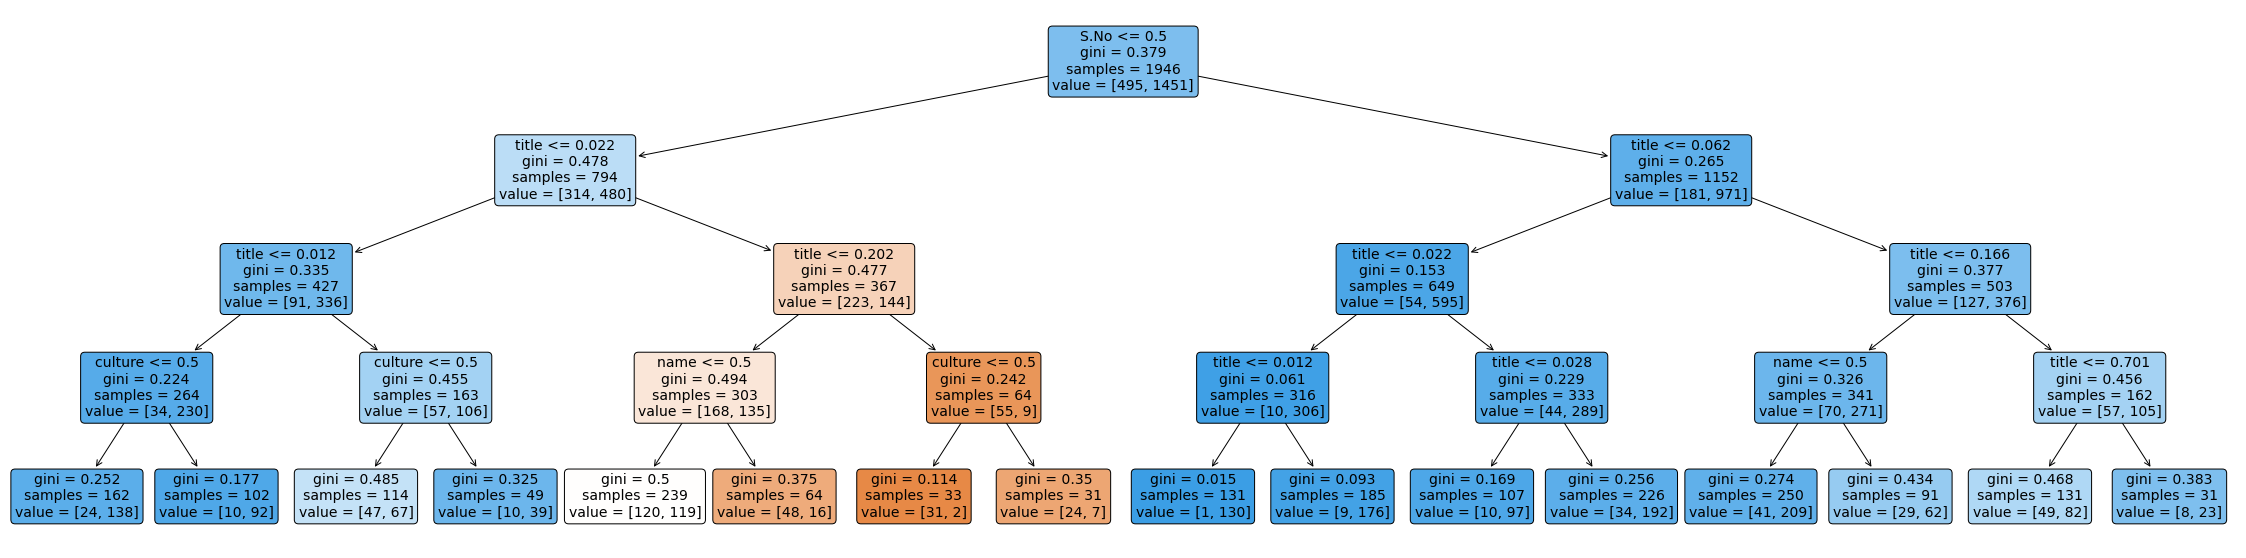

In [197]:
# setting figure size
plt.figure(figsize=(40, 10))


# developing a plotted tree
plot_tree(decision_tree = tree_tuned_fit, 
          feature_names = gameot.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [198]:
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [199]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance_1.png')

In [200]:
# train/test split with the logit_sig variables
gameot_data   =  gameot.loc[ : , candidate_dict['logit_full']]
gameot_target =  gameot.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            gameot_data,
            gameot_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = gameot_target)

In [201]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [202]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9737
Testing  ACCURACY: 0.8769
AUC Score        : 0.8255


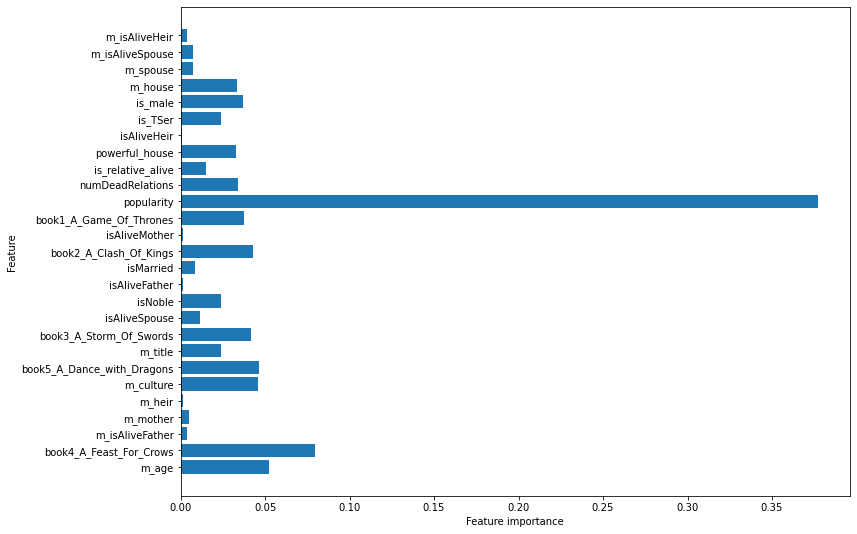

In [203]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [204]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 36
False Positives: 14
False Negatives: 10
True Positives : 135



In [205]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6862,0.7630,0.8256,"(20, 30, 4, 141)"
1,Full Tree,0.6959,0.8252,0.8205,"(22, 28, 7, 138)"
2,Pruned Tree,0.6997,0.7836,0.8359,"(21, 29, 3, 142)"
3,Tuned LR,0.6828,0.7579,0.8205,"(20, 30, 5, 140)"
4,Tuned Tree,0.7824,0.7778,0.8615,"(31, 19, 8, 137)"
5,Random Forest (Full),0.8255,0.9737,0.8769,"(36, 14, 10, 135)"


In [208]:
# # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)


# # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)


# # declaring a hyperparameter space
# estimator_range  = np.arange(100, 1100, 250)
# leaf_range       = np.arange(1, 31, 10)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 96,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(gameot_data, gameot_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 600, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.6768


In [209]:
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, n_estimators=600, random_state=219,
                       warm_start=True)

In [210]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 1,
                                      n_estimators     = 600,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(gameot_data, gameot_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.9732
Forest Tuned Testing  ACCURACY: 0.9795
Forest Tuned AUC Score        : 0.9862


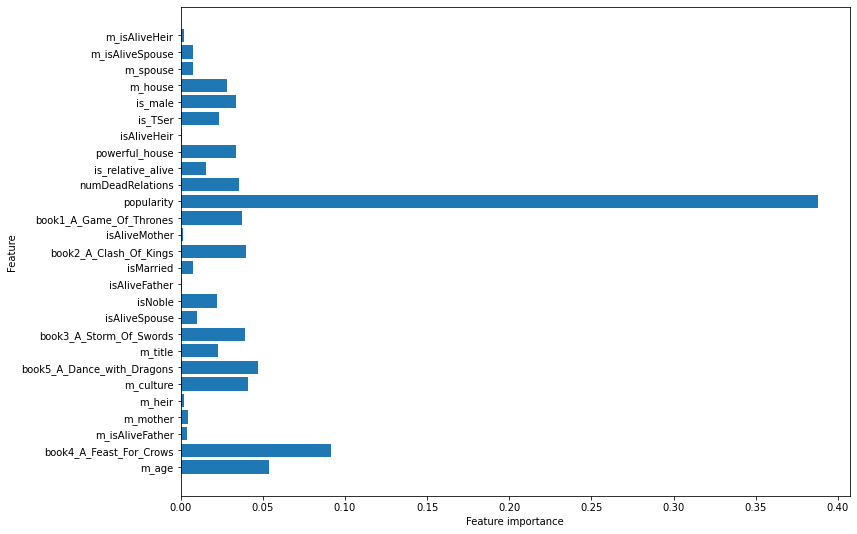

In [211]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [212]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 50
False Positives: 0
False Negatives: 4
True Positives : 141



In [213]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6862,0.7630,0.8256,"(20, 30, 4, 141)"
1,Full Tree,0.6959,0.8252,0.8205,"(22, 28, 7, 138)"
2,Pruned Tree,0.6997,0.7836,0.8359,"(21, 29, 3, 142)"
3,Tuned LR,0.6828,0.7579,0.8205,"(20, 30, 5, 140)"
4,Tuned Tree,0.7824,0.7778,0.8615,"(31, 19, 8, 137)"
5,Random Forest (Full),0.8255,0.9737,0.8769,"(36, 14, 10, 135)"
6,Tuned Random Forest (Full),0.9862,0.9732,0.9795,"(50, 0, 4, 141)"


In [214]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8407
Testing ACCURACY : 0.8359
AUC Score        : 0.7259


In [215]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 7
True Positives : 138



In [216]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6862,0.7630,0.8256,"(20, 30, 4, 141)"
1,Full Tree,0.6959,0.8252,0.8205,"(22, 28, 7, 138)"
2,Pruned Tree,0.6997,0.7836,0.8359,"(21, 29, 3, 142)"
3,Tuned LR,0.6828,0.7579,0.8205,"(20, 30, 5, 140)"
4,Tuned Tree,0.7824,0.7778,0.8615,"(31, 19, 8, 137)"
5,Random Forest (Full),0.8255,0.9737,0.8769,"(36, 14, 10, 135)"
6,Tuned Random Forest (Full),0.9862,0.9732,0.9795,"(50, 0, 4, 141)"
7,GBM (Full),0.7259,0.8407,0.8359,"(25, 25, 7, 138)"


In [217]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1, 2.2, 0.5)
# estimator_range    = np.arange(100, 501, 25)
# depth_range        = np.arange(2, 11, 2)
# warm_start_range   = [True, False]

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 500,
#                            random_state        = 219,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(gameot_data, gameot_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.1}
Tuned Training AUC: 0.6759


In [218]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(max_depth=2, n_estimators=300, random_state=219)

In [219]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 2,
                                       n_estimators  = 300,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(gameot_data, gameot_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.831
Testing  ACCURACY: 0.8872
AUC Score        : 0.8128


In [238]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 5
True Positives : 140



In [239]:
# # declaring model performance objects
# gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
# gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
# gbm_auc       = roc_auc_score(y_true  = y_test,
#                               y_score = gbm_tuned_pred).round(4)


# # appending to model_performance
# model_performance = model_performance.append(
#                           {'Model Name'        : 'Tuned GBM',
#                           'Training Accuracy'  : gbm_train_acc,
#                           'Testing Accuracy'   : gbm_test_acc,
#                           'AUC Score'          : gbm_auc,
#                           'Confusion Matrix'   : (gbm_tuned_tn,
#                                                   gbm_tuned_fp,
#                                                   gbm_tuned_fn,
#                                                   gbm_tuned_tp)},
#                           ignore_index = True)


# # checking the results
# model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6862,0.7630,0.8256,"(20, 30, 4, 141)"
1,Full Tree,0.6959,0.8252,0.8205,"(22, 28, 7, 138)"
2,Pruned Tree,0.6997,0.7836,0.8359,"(21, 29, 3, 142)"
3,Tuned LR,0.6828,0.7579,0.8205,"(20, 30, 5, 140)"
4,Tuned Tree,0.7824,0.7778,0.8615,"(31, 19, 8, 137)"
5,Random Forest (Full),0.8255,0.9737,0.8769,"(36, 14, 10, 135)"
6,Tuned Random Forest (Full),0.9862,0.9732,0.9795,"(50, 0, 4, 141)"
7,GBM (Full),0.7259,0.8407,0.8359,"(25, 25, 7, 138)"
8,Tuned GBM,0.8128,0.8310,0.8872,"(33, 17, 5, 140)"
9,Tuned GBM,0.8128,0.8310,0.8872,"(33, 17, 5, 140)"


In [222]:
# model_performance.sort_values(by = 'AUC Score',
#                               ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
6,Tuned Random Forest (Full),0.9862,0.9732,0.9795,"(50, 0, 4, 141)"
5,Random Forest (Full),0.8255,0.9737,0.8769,"(36, 14, 10, 135)"
8,Tuned GBM,0.8128,0.8310,0.8872,"(33, 17, 5, 140)"
4,Tuned Tree,0.7824,0.7778,0.8615,"(31, 19, 8, 137)"
7,GBM (Full),0.7259,0.8407,0.8359,"(25, 25, 7, 138)"
2,Pruned Tree,0.6997,0.7836,0.8359,"(21, 29, 3, 142)"
1,Full Tree,0.6959,0.8252,0.8205,"(22, 28, 7, 138)"
0,Logistic,0.6862,0.7630,0.8256,"(20, 30, 4, 141)"
3,Tuned LR,0.6828,0.7579,0.8205,"(20, 30, 5, 140)"


In [241]:
#Comparing results
print(f"""
Model                 AUC Score                     TN, FP, FN, TP
-----                  ---------                     --------------
Logistic                   {logreg_auc_score}              {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree                  {full_tree_auc_score}              {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree                {pruned_tree_auc_score}              {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
Tuned LR                   {lr_auc}               {lr_tuned_tn, lr_tuned_fp,lr_tuned_fn, lr_tuned_tp}
Tuned Tree                 {tree_auc}              {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
*Random Forest (Full)       {rf_auc}              {rf_tn, rf_fp, rf_fn, rf_tp}
Tuned Random Forest (Full) {tuned_rf_auc}             {tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp}
GBM (Full)                 {gbm_auc}             {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
Tuned GBM                  {gbm_auc}             {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}

The Random Forest (Full) is my final model. It has a high AUC and training is greater than testing. The 0.98 AUC score is
very high and model might break in real world.
""")



Model                 AUC Score                     TN, FP, FN, TP
-----                  ---------                     --------------
Logistic                   0.6762              (20, 30, 4, 141)
Full Tree                  0.6959              (22, 28, 7, 138)
Pruned Tree                0.6997              (21, 29, 3, 142)
Tuned LR                   0.6828               (20, 30, 5, 140)
Tuned Tree                 0.7824              (31, 19, 8, 137)
*Random Forest (Full)       0.8255              (36, 14, 10, 135)
Tuned Random Forest (Full) 0.9862             (50, 0, 4, 141)
GBM (Full)                 0.8128             (25, 25, 7, 138)
Tuned GBM                  0.8128             (33, 17, 5, 140)

The Random Forest (Full) is my final model. It has a high AUC and training is greater than testing. The 0.98 AUC score is
very high and model might break in real world.

